<a href="https://colab.research.google.com/github/FennyAmalo/EdgeHill-Skills-Bootcamp/blob/main/MachineLearning_Decision_Tree_Diabetic_patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is part of the assignment for Machine Learning module - Edge Hill University Skills Bootcamp

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
data = pd.read_csv("diabetes.csv", header=None, names=col_names) # dataset location
data.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = data[feature_cols] # Features
y = data.label # Target variable

# Split the dataset into a training set and a testing set for performance evaluation
# Split dataset into training set and test set with 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 67.53246753246754


Text(0.5, 0, 'Number of Patients')

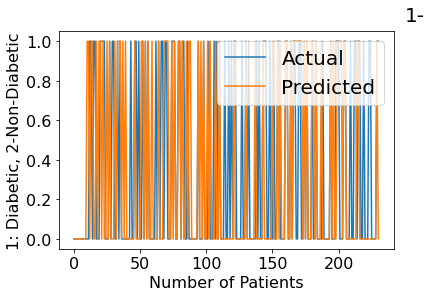

In [ ]:
# Plot predicted and the actual labels over time for the testing samples
plt.figure()
y_test=y_test.to_numpy()
plt.plot(y_test,label="Actual")
plt.plot(y_pred,label="Predicted")
plt.tick_params(labelsize=16)
plt.legend(loc='best', prop={'size': 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.text(250, 1.1, r'1-',fontsize=20)
plt.legend(loc='best', prop={'size': 20})
plt.ylabel('1: Diabetic, 2-Non-Diabetic', fontsize=16)
plt.xlabel('Number of Patients', fontsize=16)

In [ ]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 77.05627705627705


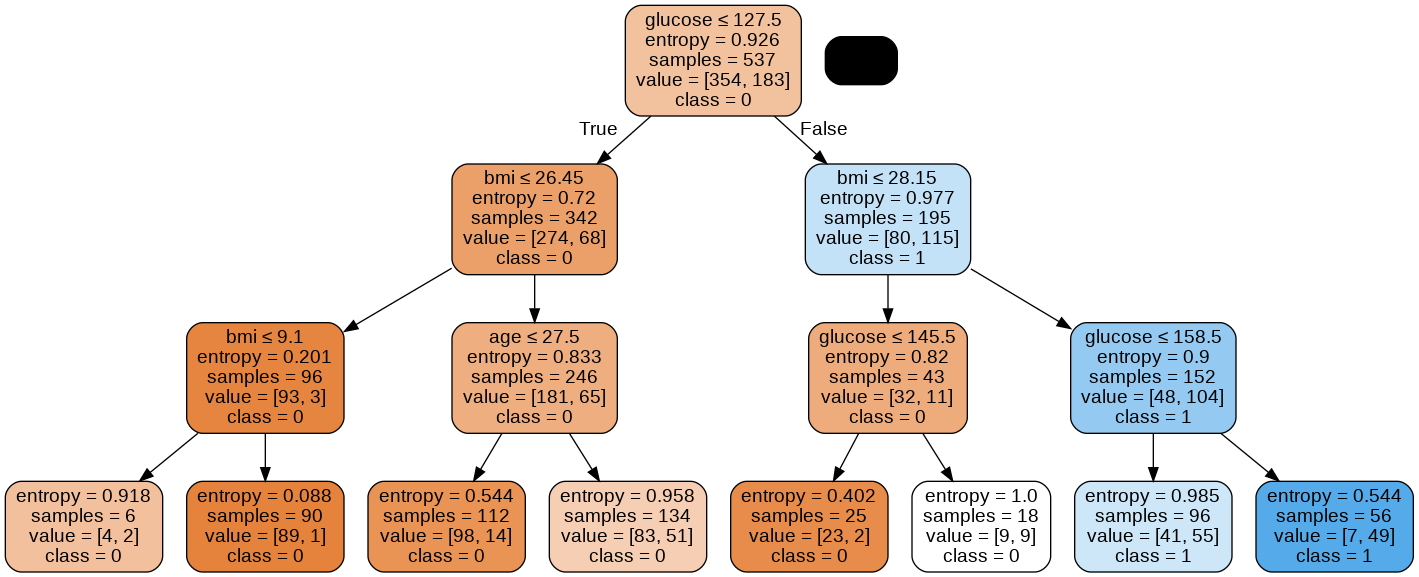

In [ ]:
# Visualising Decision Trees
from six import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, 
 filled=True, rounded=True,
 special_characters=True, feature_names = feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('diabetes.png')
Image(graph.create_png())
